Barry - Business understanding
Drove  - Data understanding
Directlyt to the  - Data Preparation 
Medical  - Modelling
Emergency  - Evaluation
Department  - Deployment

In [ ]:
#BUSINESS UNDERSTANDING : 

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('regression.csv')

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [ ]:
#missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [ ]:
#unique valyes
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [ ]:
df['Account'].unique()


array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001])

In [ ]:
for col in df.columns:
  print(col,len(df[col].unique()),df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [ ]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [ ]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [ ]:
df.describe(include = 'object')

,Month,Cost Centre,Account Description,Account Type
count,4212,4212,4212,4212
unique,12,9,13,4
top,Jan,CC100,Product Sales,Expense
freq,351,468,324,1620


In [ ]:
#vizualization
from matplotlib import pyplot as plt
import seaborn as sns


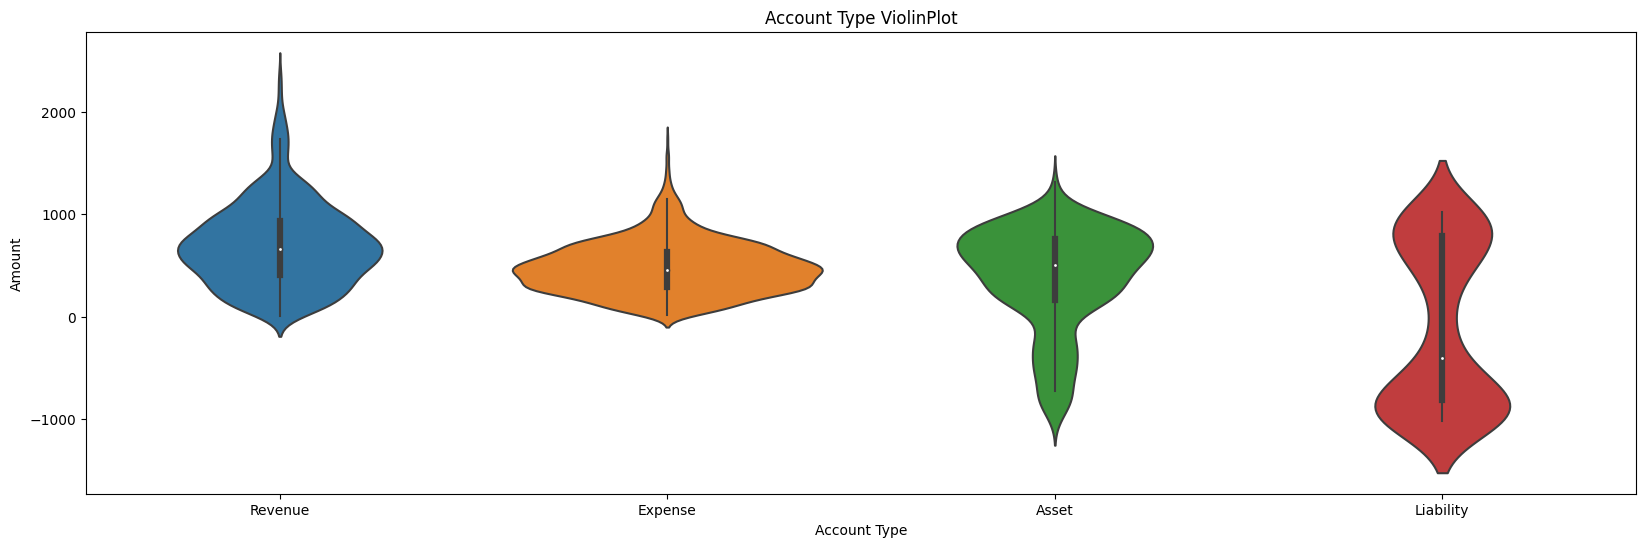

In [ ]:
plt.figure(figsize = (20,6))
sns.violinplot(x='Account Type', y = 'Amount', data = df).set_title('Account Type ViolinPlot')
plt.show()

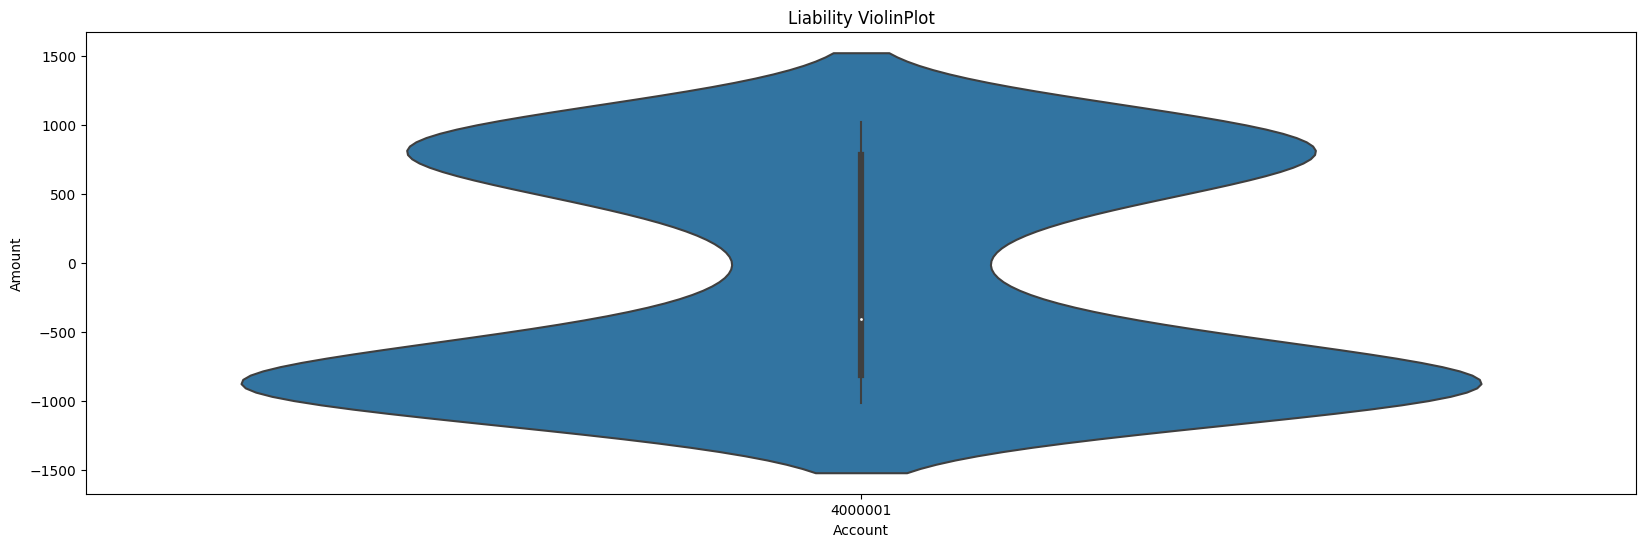

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

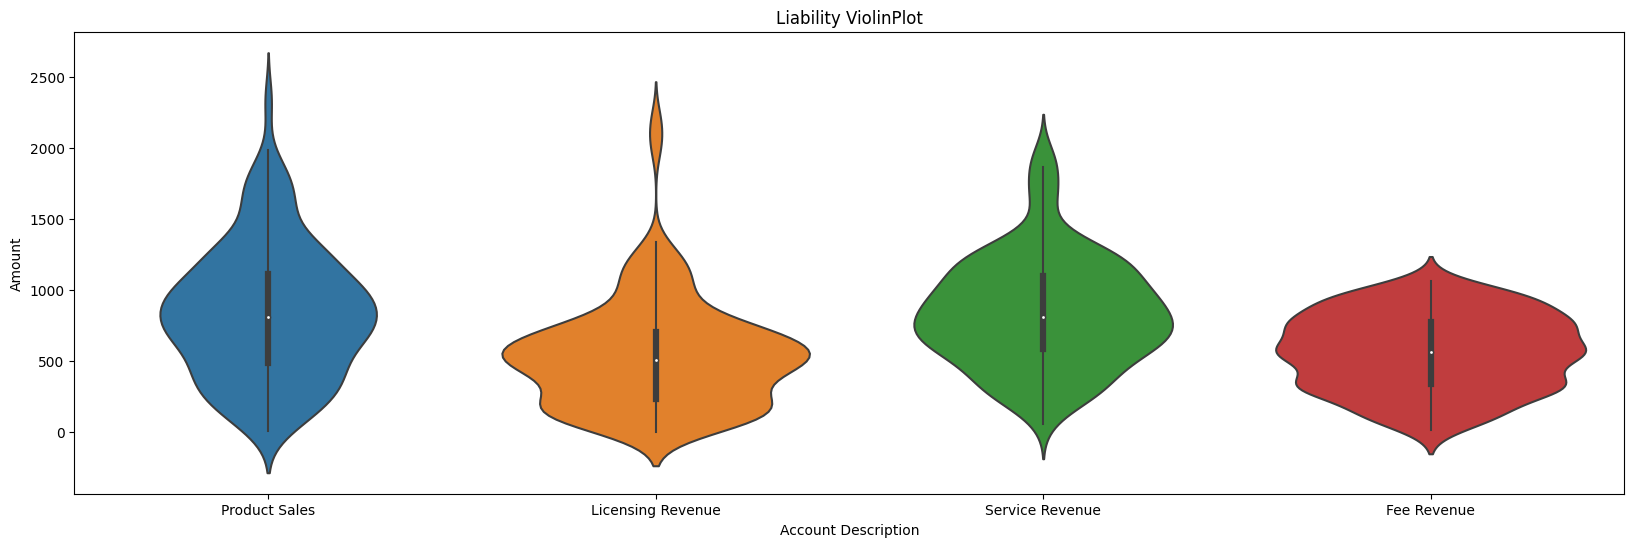

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Liability ViolinPlot')
plt.show()

#Review Trends


In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
monthmap = {
    
 'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,

}

In [ ]:
monthmap['Feb']

2

In [ ]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])

In [ ]:
df['Day'] = 1

In [ ]:
df['Date'] = df['Year'].astype(str)+'-'+df['Period'].astype(str)+'-'+df['Day'].astype(str)

In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

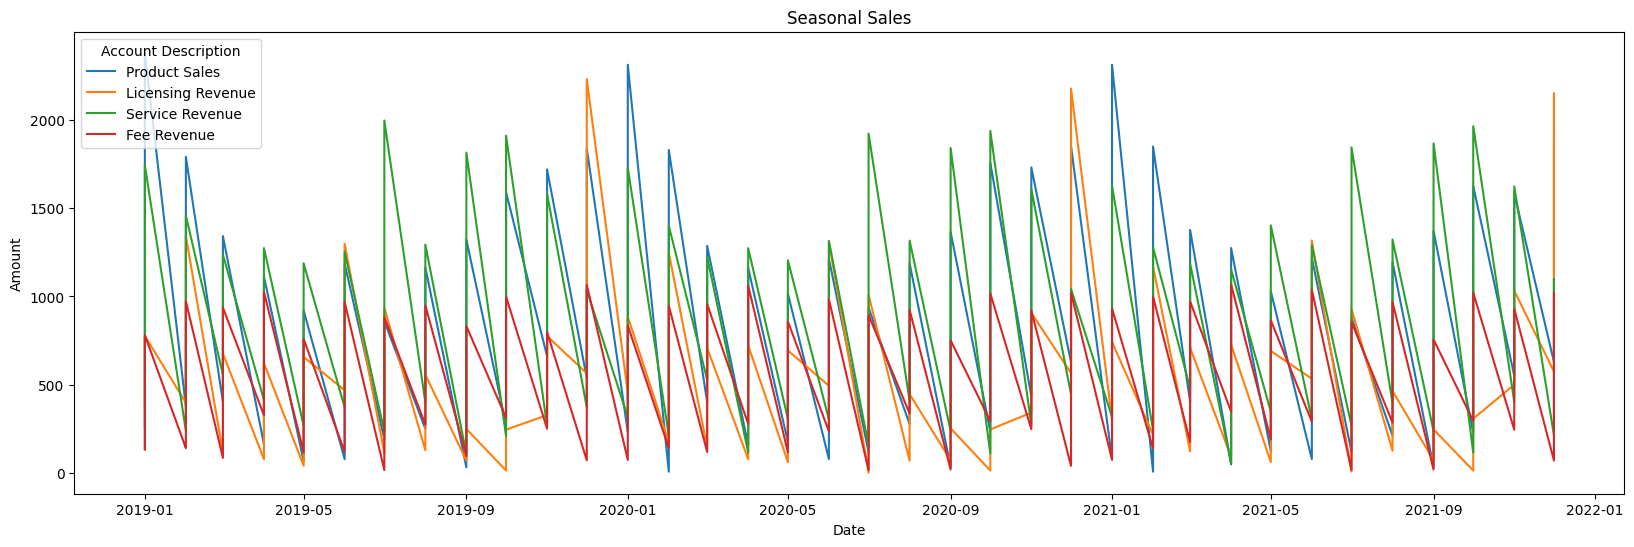

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'Date' , y = 'Amount' , hue = 'Account Description' , estimator = None , data = df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

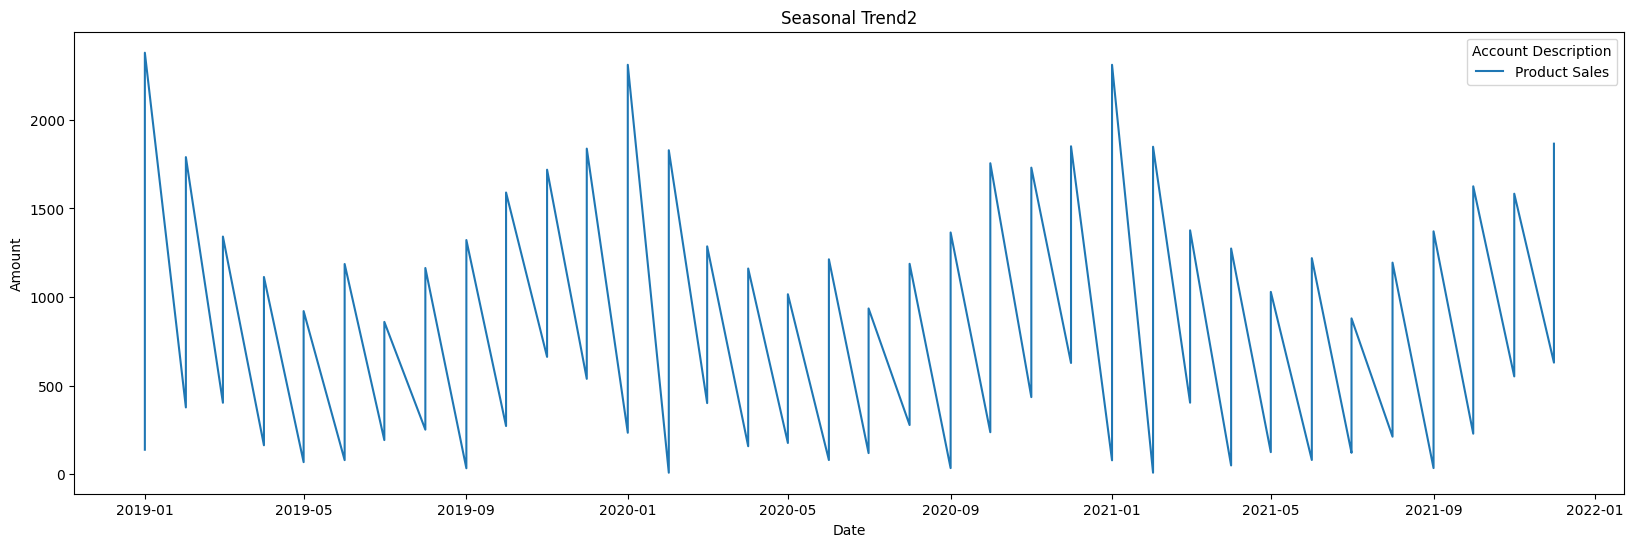

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'Date',y = 'Amount' , hue = 'Account Description' , estimator = None, data = df[df['Account Description'] == 'Product Sales']).set_title('Seasonal Trend2')
plt.show()

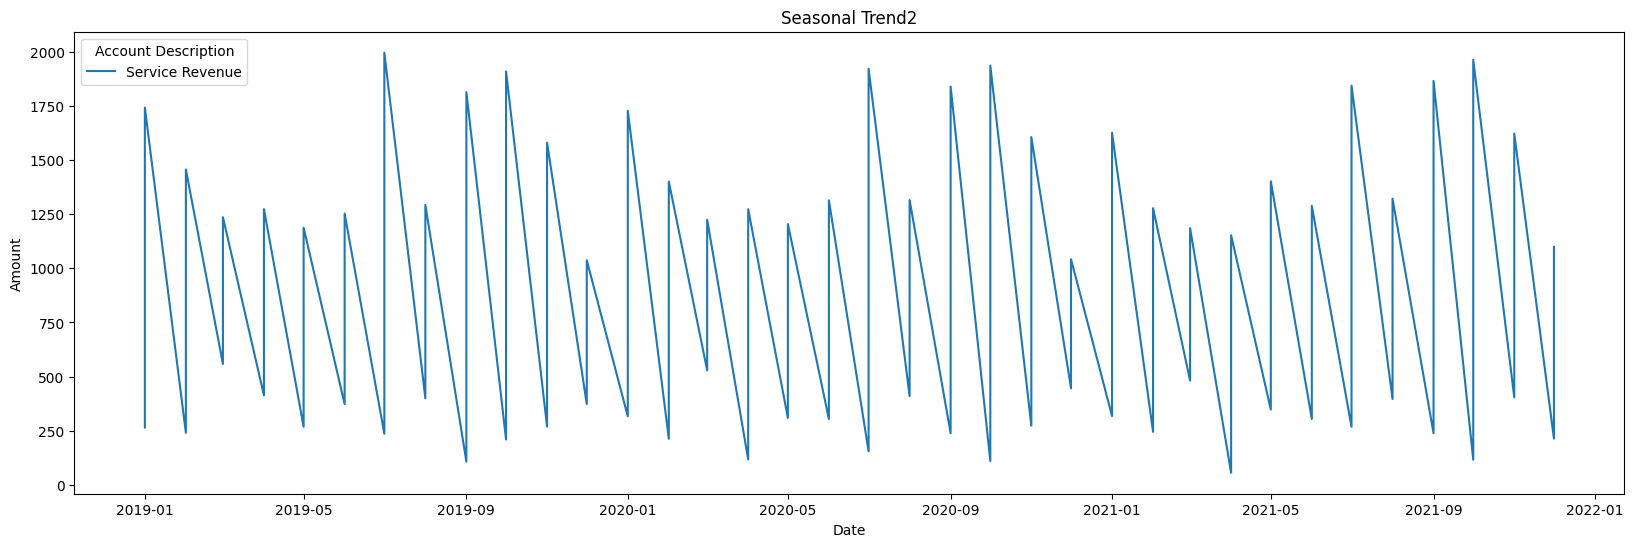

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'Date' , y ='Amount', hue = 'Account Description' , estimator = None, data = df[df['Account Description']=='Service Revenue']).set_title('Seasonal Trend2')
plt.show()

##Correlation

In [ ]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [ ]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}


In [ ]:
corrdict

{0: {1000000: 1344.051},
 1: {1000001: 480.968},
 2: {1000002: 650.82},
 3: {1000004: 339.36},
 4: {2000000: 1125.328},
 5: {2000001: 412.088},
 6: {2000002: 259.488},
 7: {2000003: 376.697},
 8: {2000005: 1105.277},
 9: {3000000: 476.713},
 10: {3000001: 980.0},
 11: {3000002: 385.275},
 12: {4000001: 980.0},
 13: {1000000: 1296.06},
 14: {1000001: 459.764},
 15: {1000002: 512.169},
 16: {1000004: 732.538},
 17: {2000000: 1404.449},
 18: {2000001: 584.214},
 19: {2000002: 306.435},
 20: {2000003: 318.227},
 21: {2000005: 1531.884},
 22: {3000000: 464.197},
 23: {3000001: 980.0},
 24: {3000002: 491.607},
 25: {4000001: 200.0},
 26: {1000000: 244.447},
 27: {1000001: 776.767},
 28: {1000002: 872.102},
 29: {1000004: 690.433},
 30: {2000000: 53.563},
 31: {2000001: 529.574},
 32: {2000002: 450.893},
 33: {2000003: 454.857},
 34: {2000005: 43.042},
 35: {3000000: -296.261},
 36: {3000001: 980.0},
 37: {3000002: 158.931},
 38: {4000001: -980.0},
 39: {1000000: 994.789},
 40: {1000001: 588.

In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict)
corrdf

,0,1,2,3,4,5,6,7,8,9,...,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211
1000000,1344.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000001,NaN,480.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,NaN,NaN,650.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,339.36,NaN,NaN,NaN,NaN,NaN,NaN,...,1020.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,1125.328,NaN,NaN,NaN,NaN,NaN,...,NaN,680.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000001,NaN,NaN,NaN,NaN,NaN,412.088,NaN,NaN,NaN,NaN,...,NaN,NaN,701.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000002,NaN,NaN,NaN,NaN,NaN,NaN,259.488,NaN,NaN,NaN,...,NaN,NaN,NaN,427.631,NaN,NaN,NaN,NaN,NaN,NaN
2000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.697,NaN,NaN,...,NaN,NaN,NaN,NaN,540.06,NaN,NaN,NaN,NaN,NaN
2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105.277,NaN,...,NaN,NaN,NaN,NaN,NaN,698.121,NaN,NaN,NaN,NaN
3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.713,...,NaN,NaN,NaN,NaN,NaN,NaN,-282.056,NaN,NaN,NaN


In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [ ]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


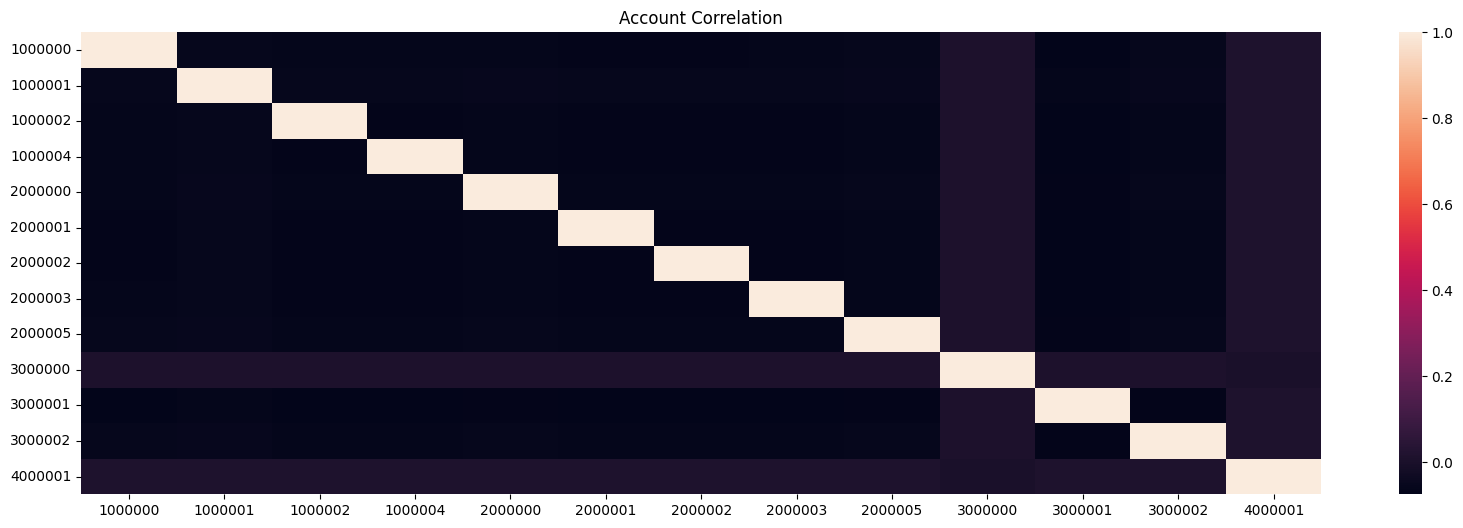

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [ ]:
df[df['Account'] == 3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [ ]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


#Data Preparation


In [ ]:
import numpy as np


In [ ]:
for account in df['Account'].unique():
  print(account)

1000000
1000001
1000002
1000004
2000000
2000001
2000002
2000003
2000005
3000000
3000001
3000002
4000001


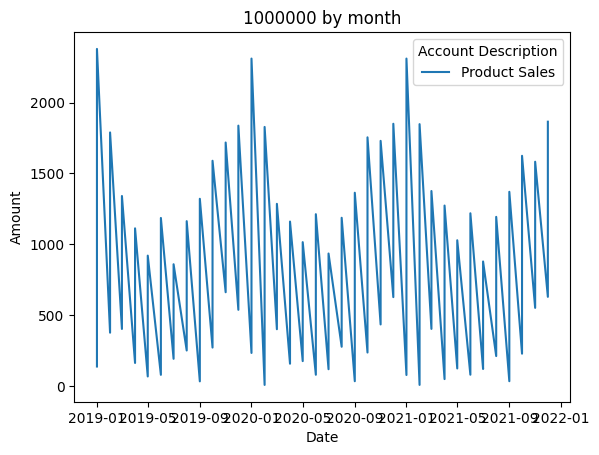

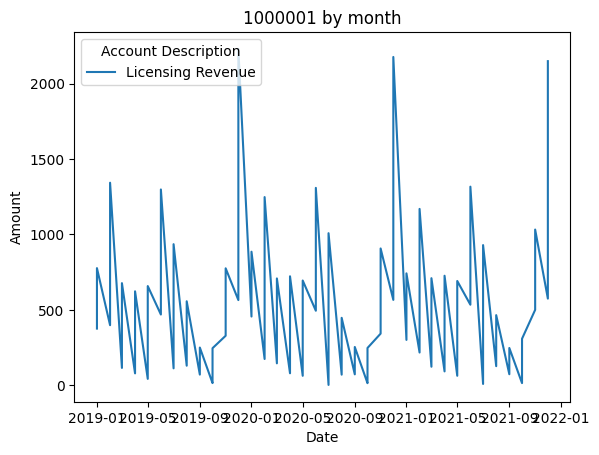

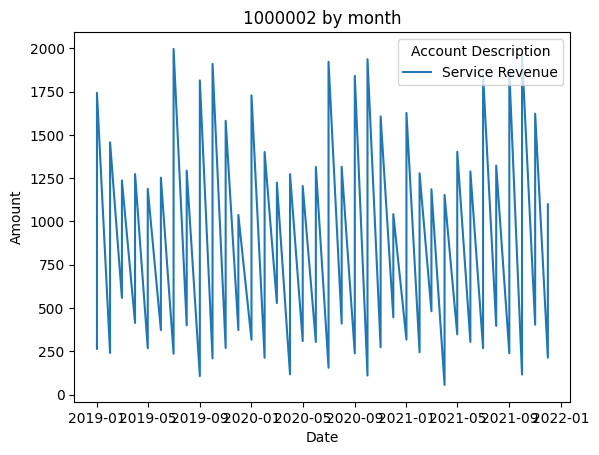

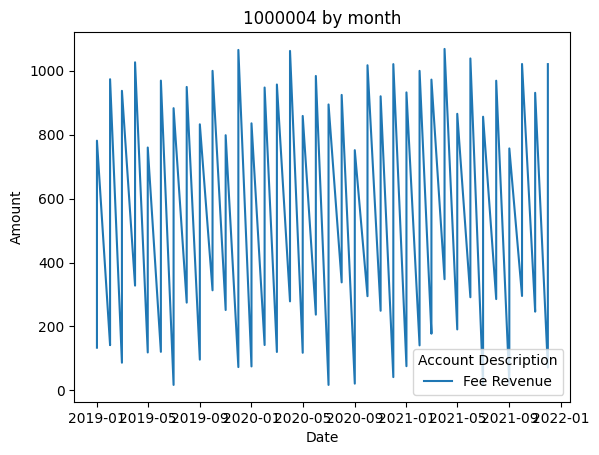

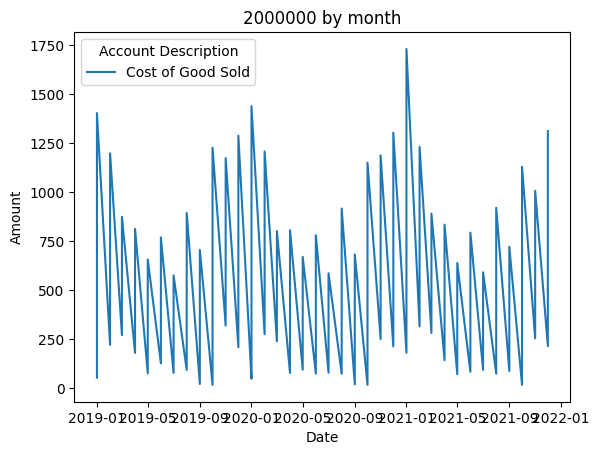

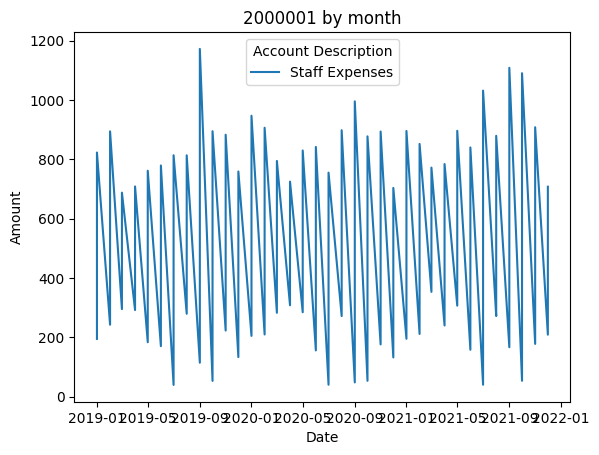

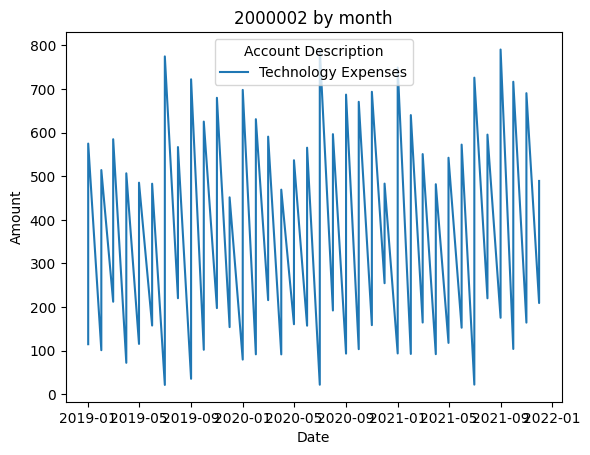

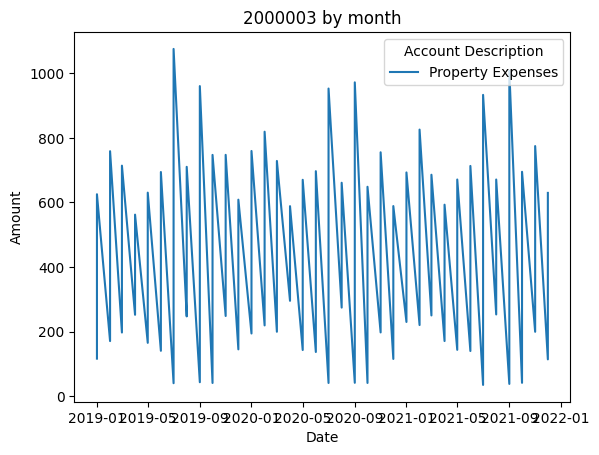

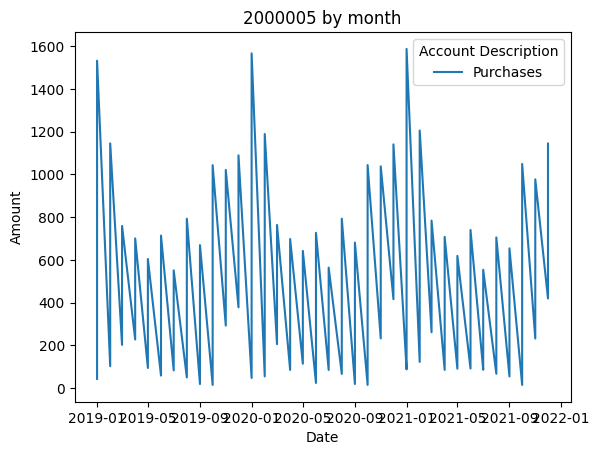

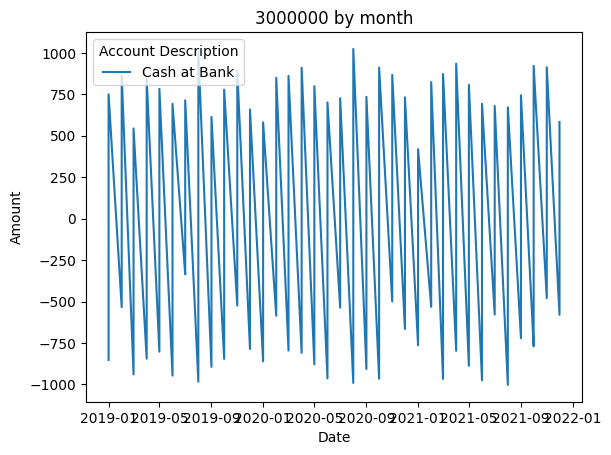

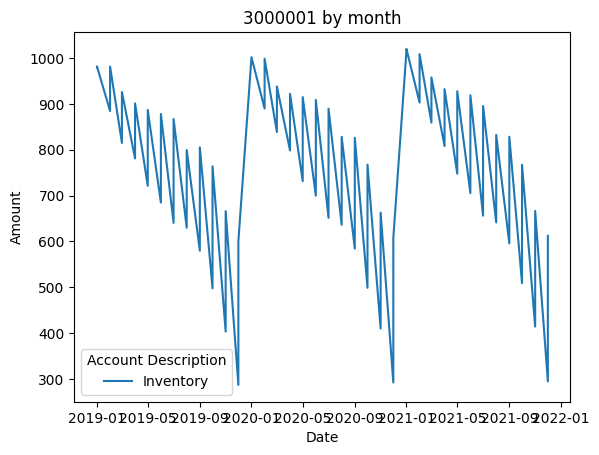

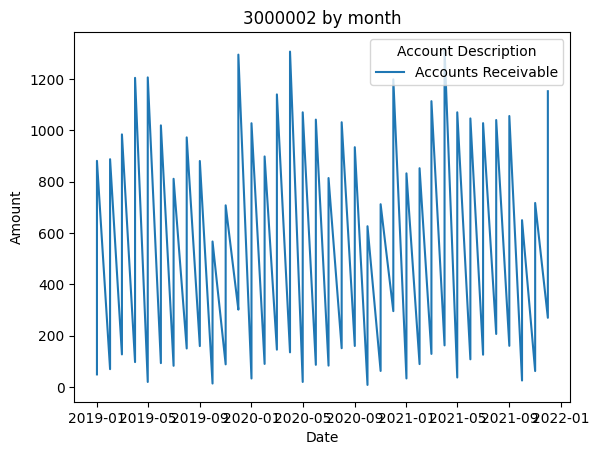

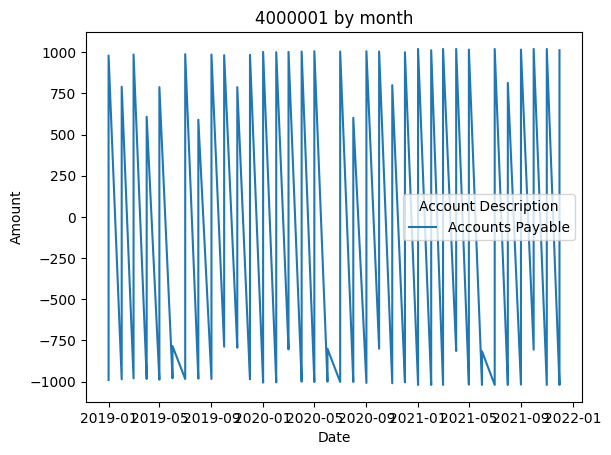

In [ ]:
for account in df['Account'].unique():
  sns.lineplot(x = 'Date' , y = 'Amount', estimator = None, hue = 'Account Description', data =df[df['Account']==account]).set_title('{} by month'.format(account))
  #sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
  plt.show()

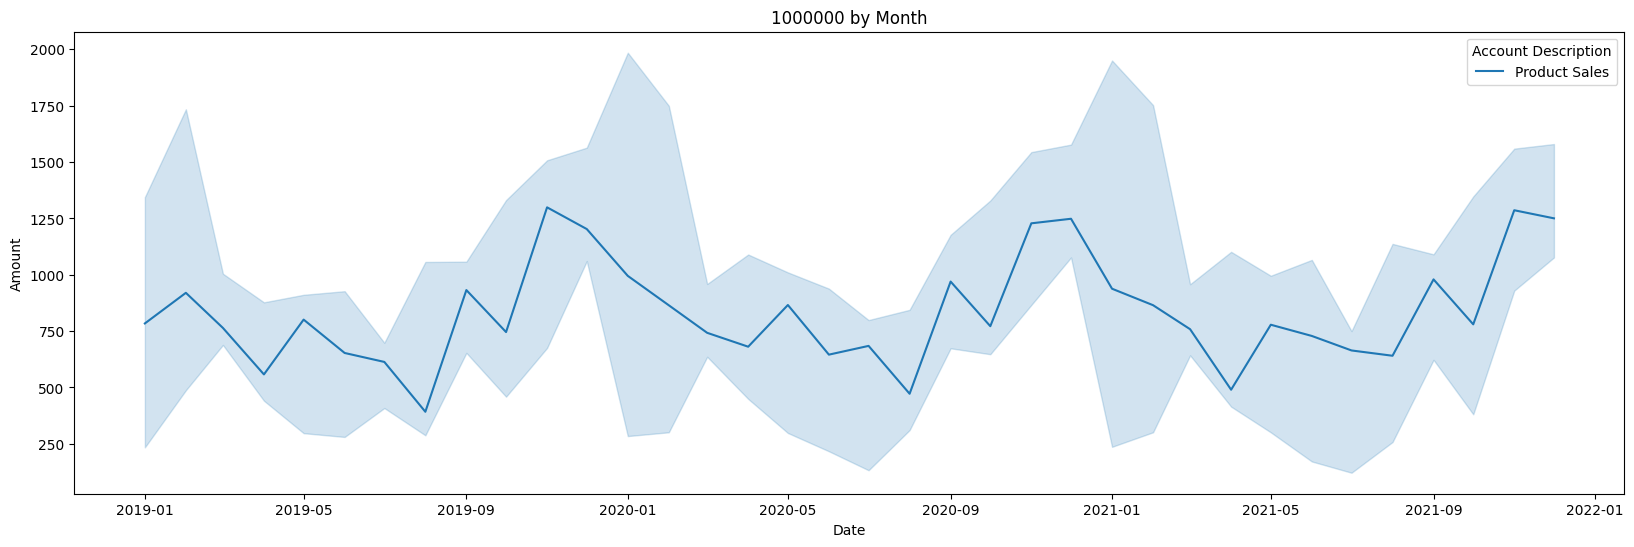

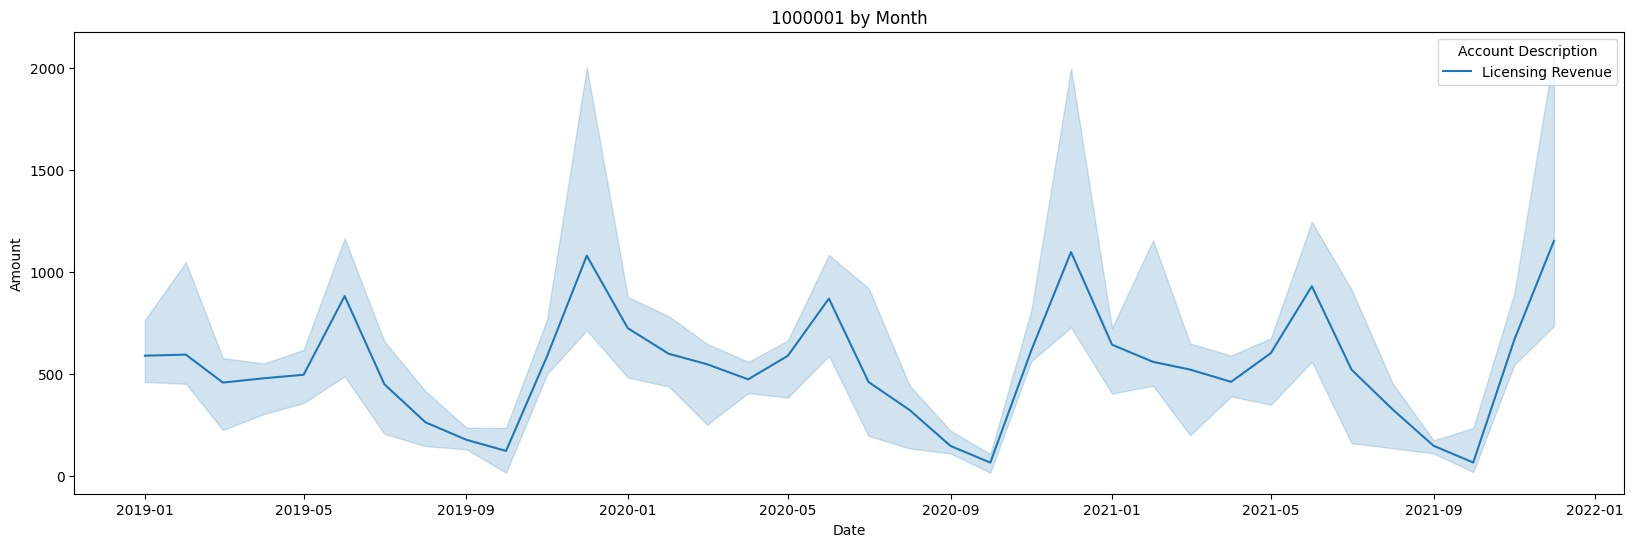

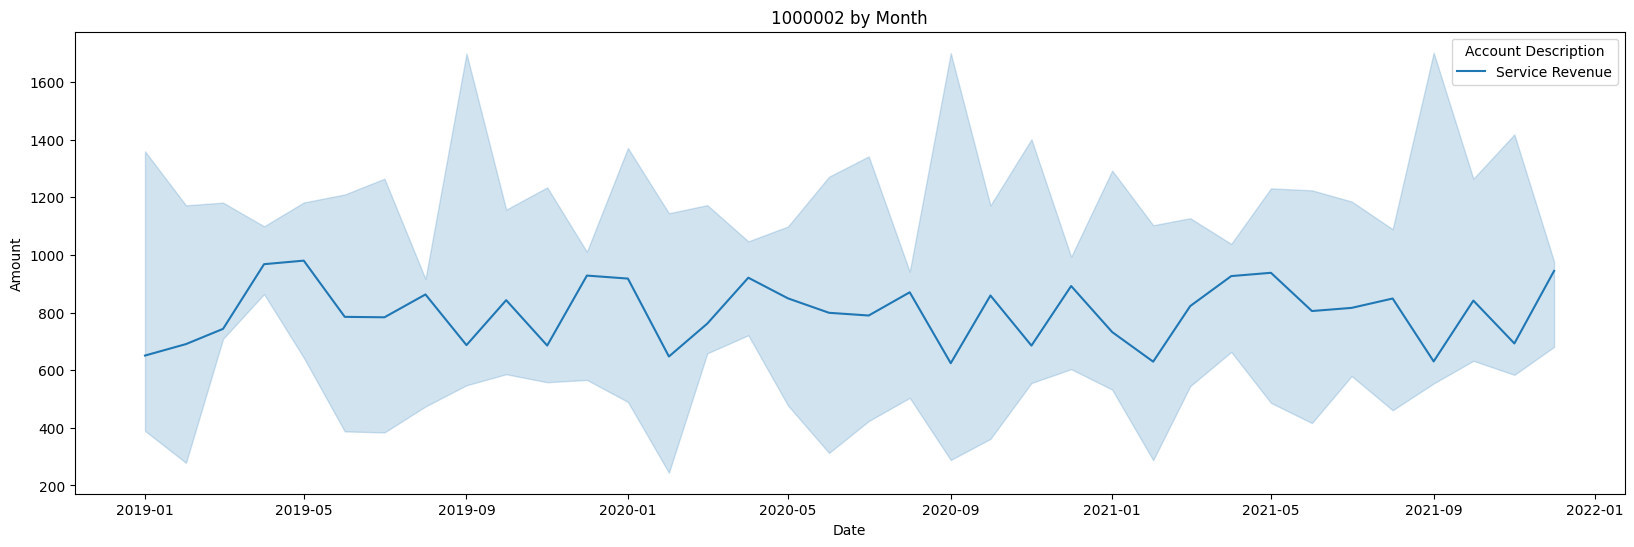

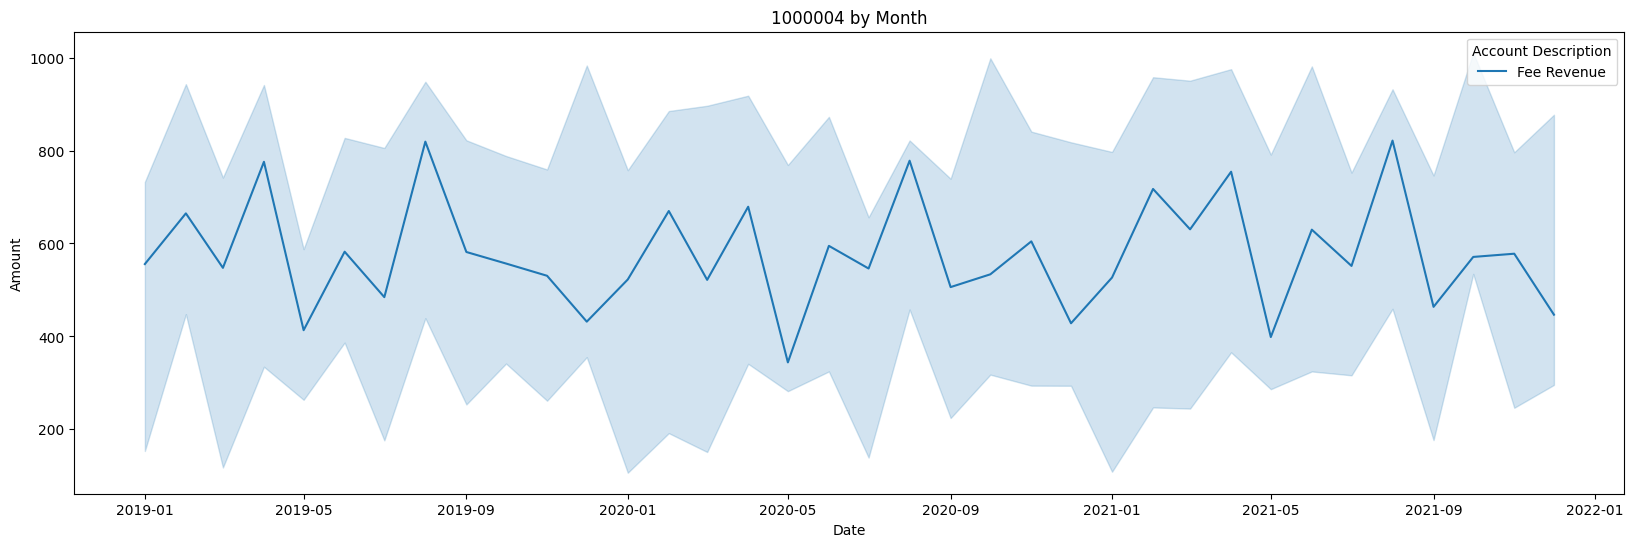

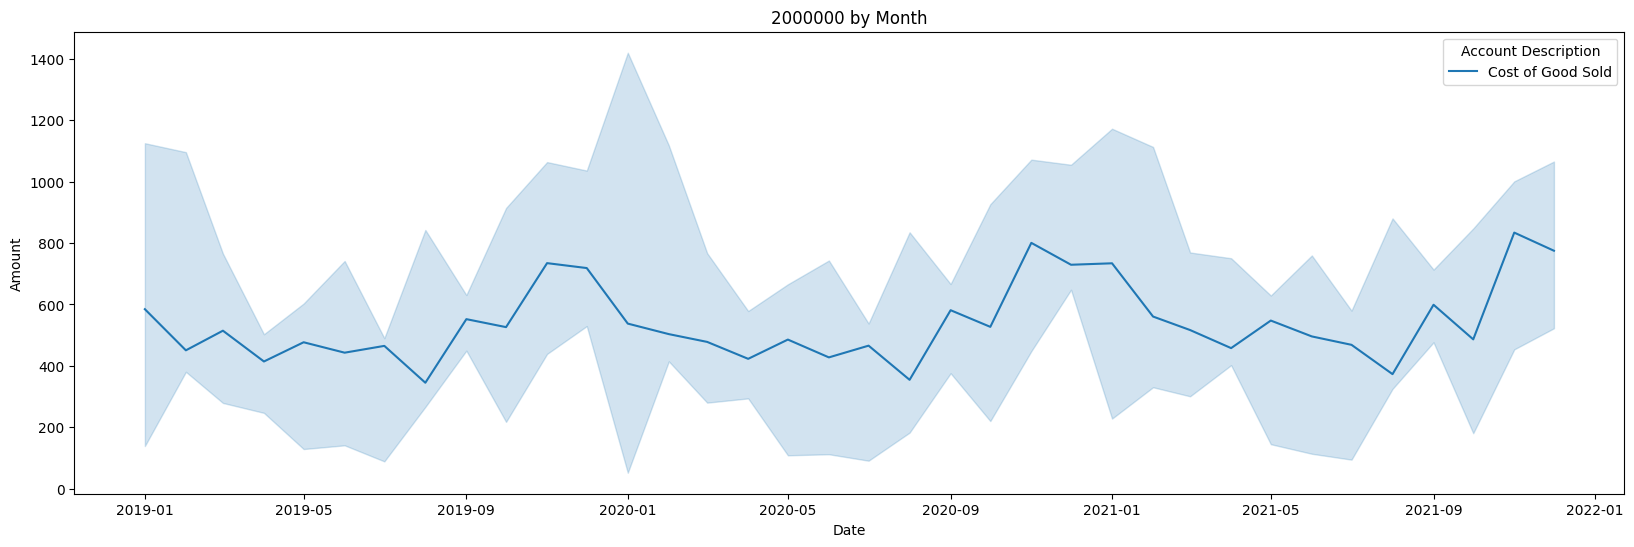

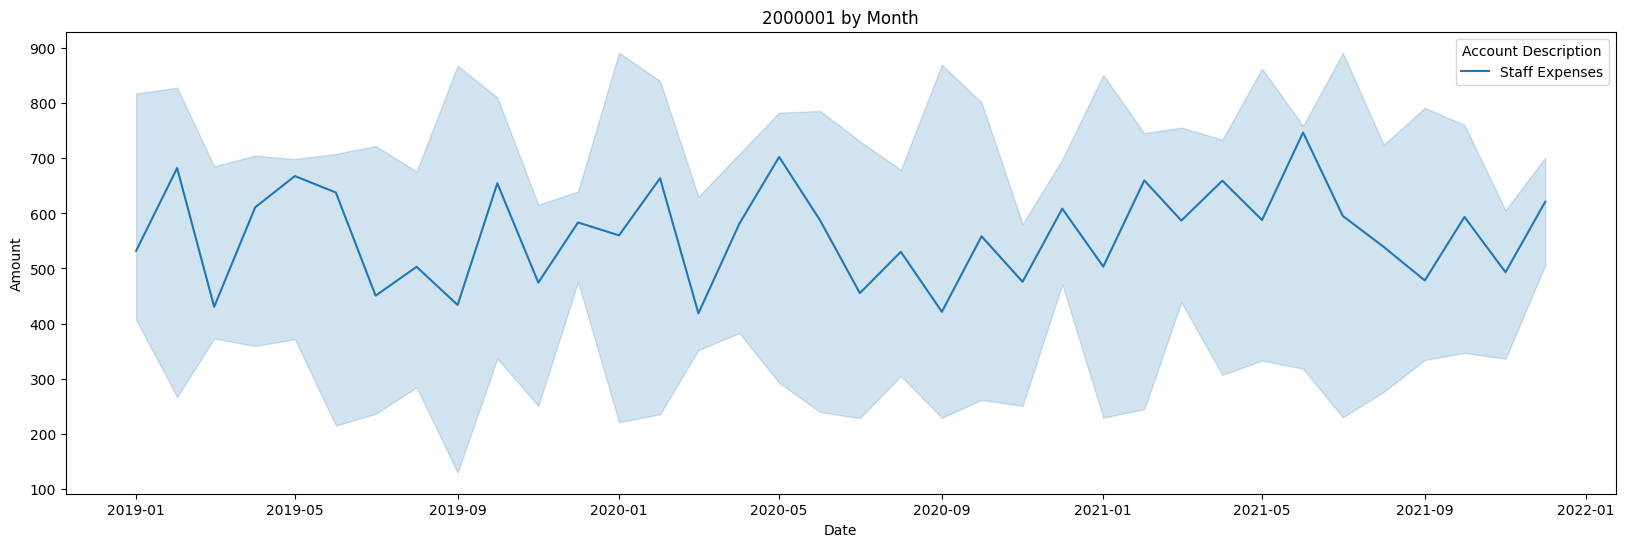

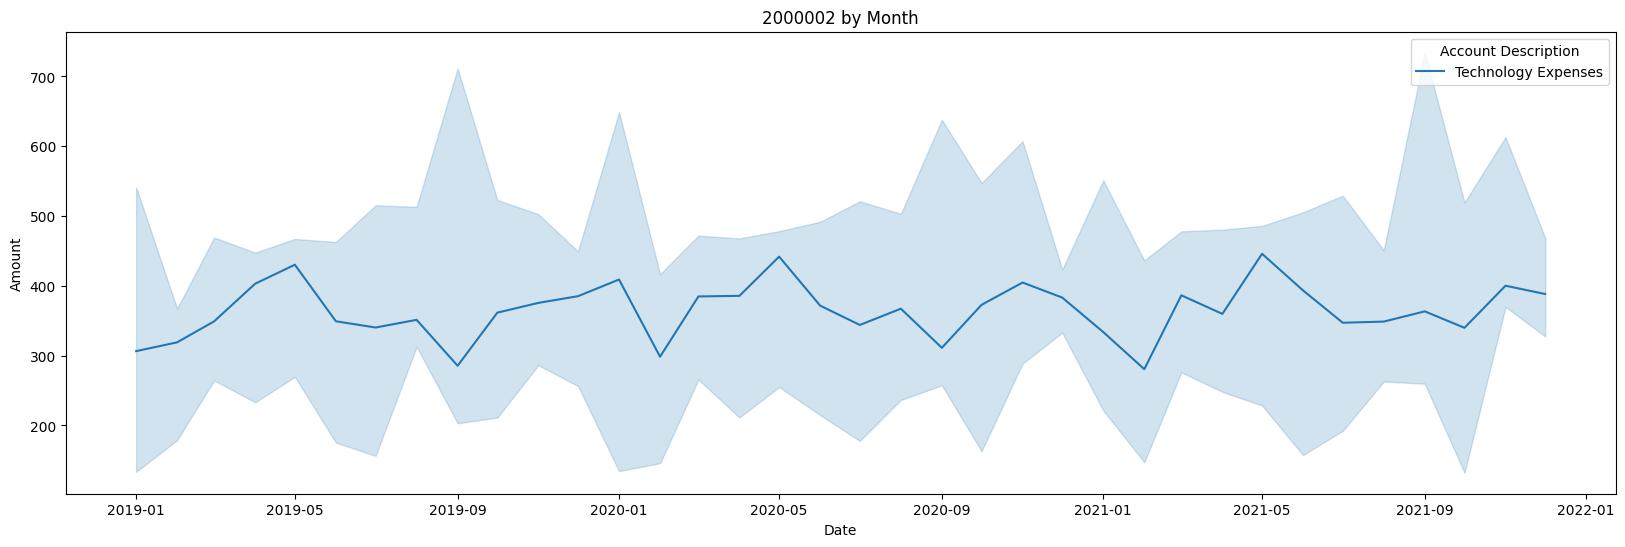

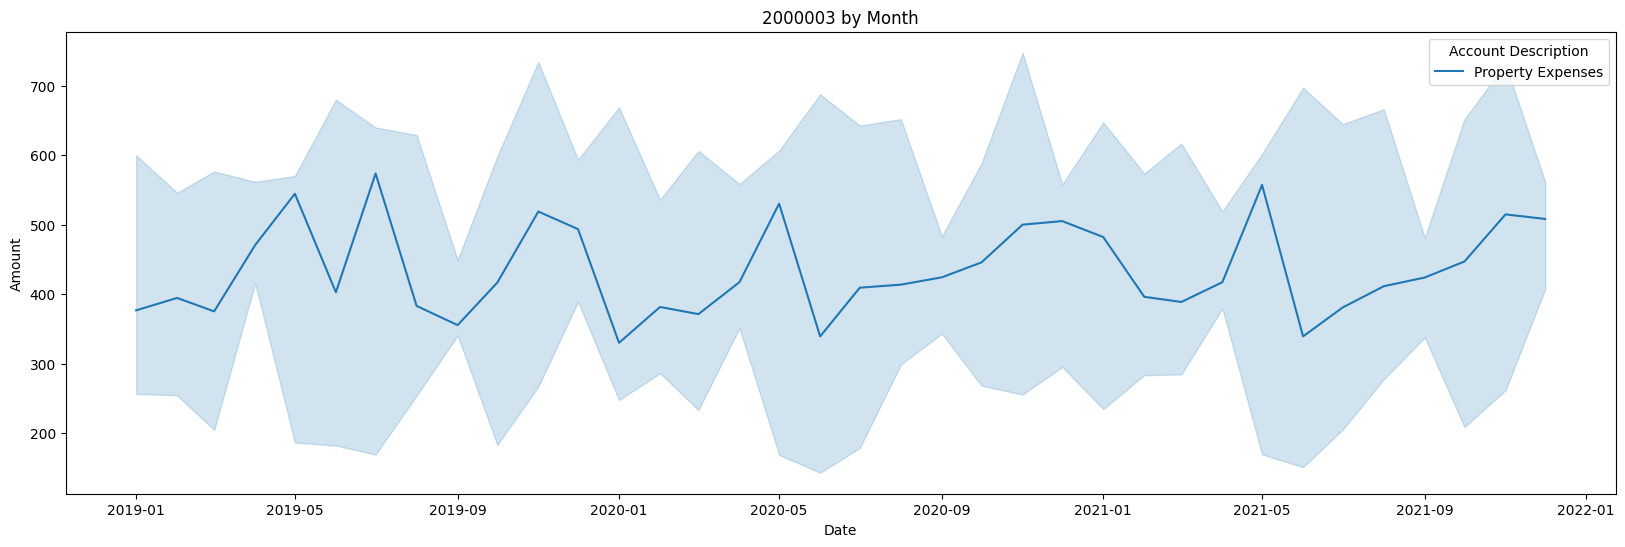

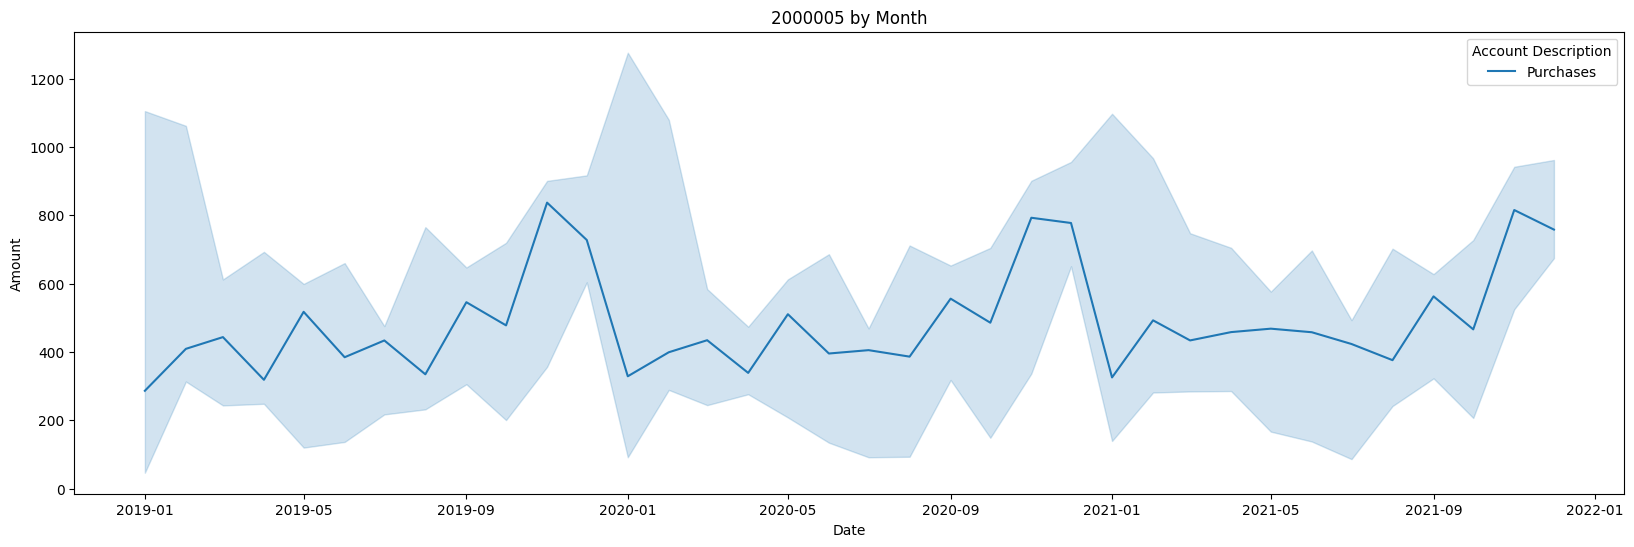

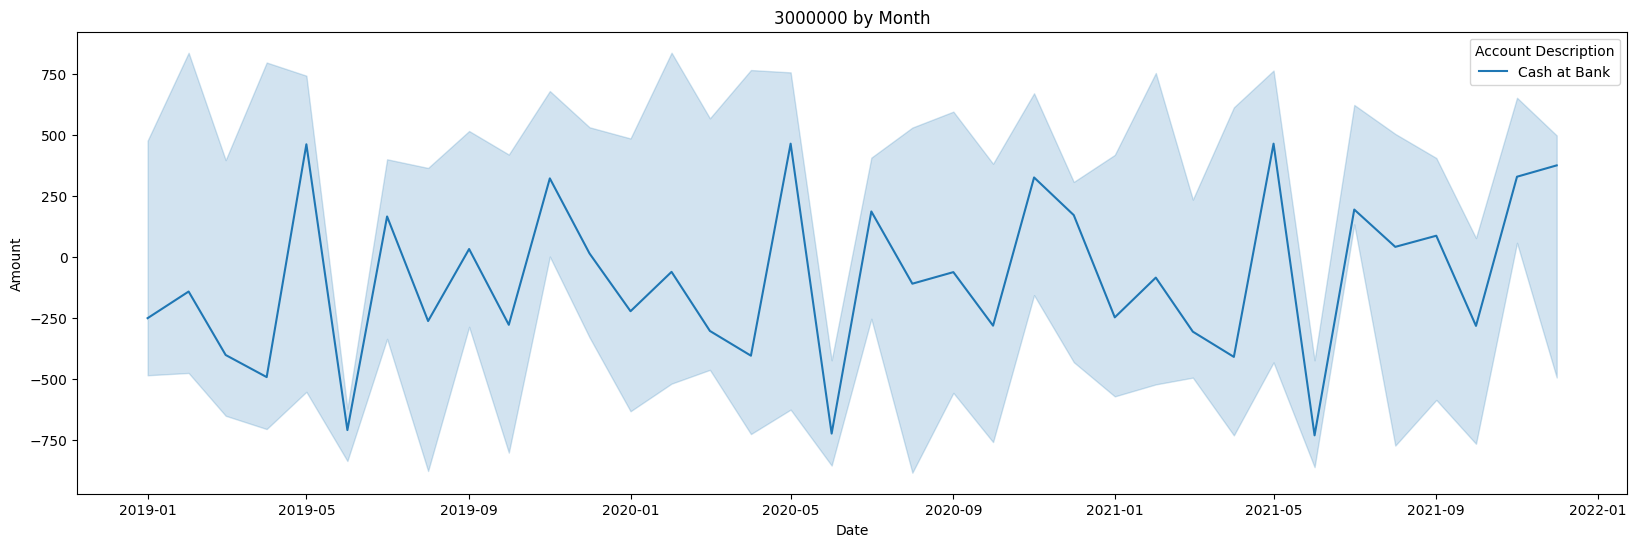

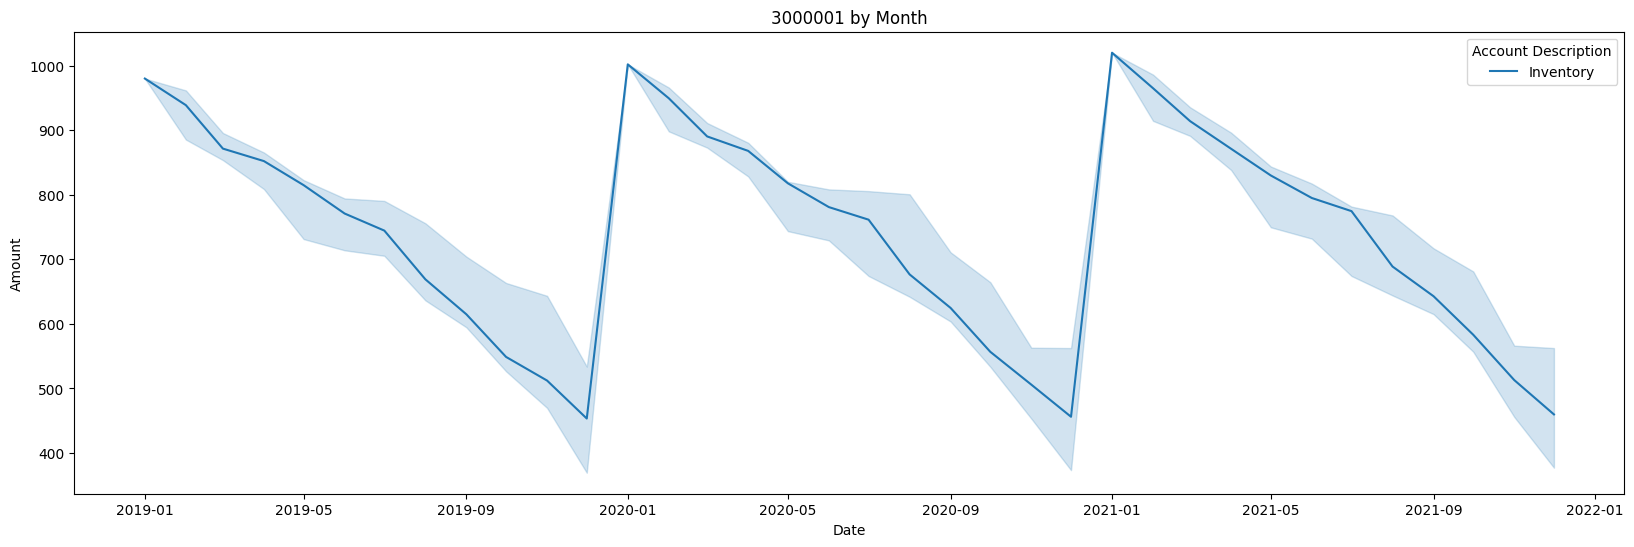

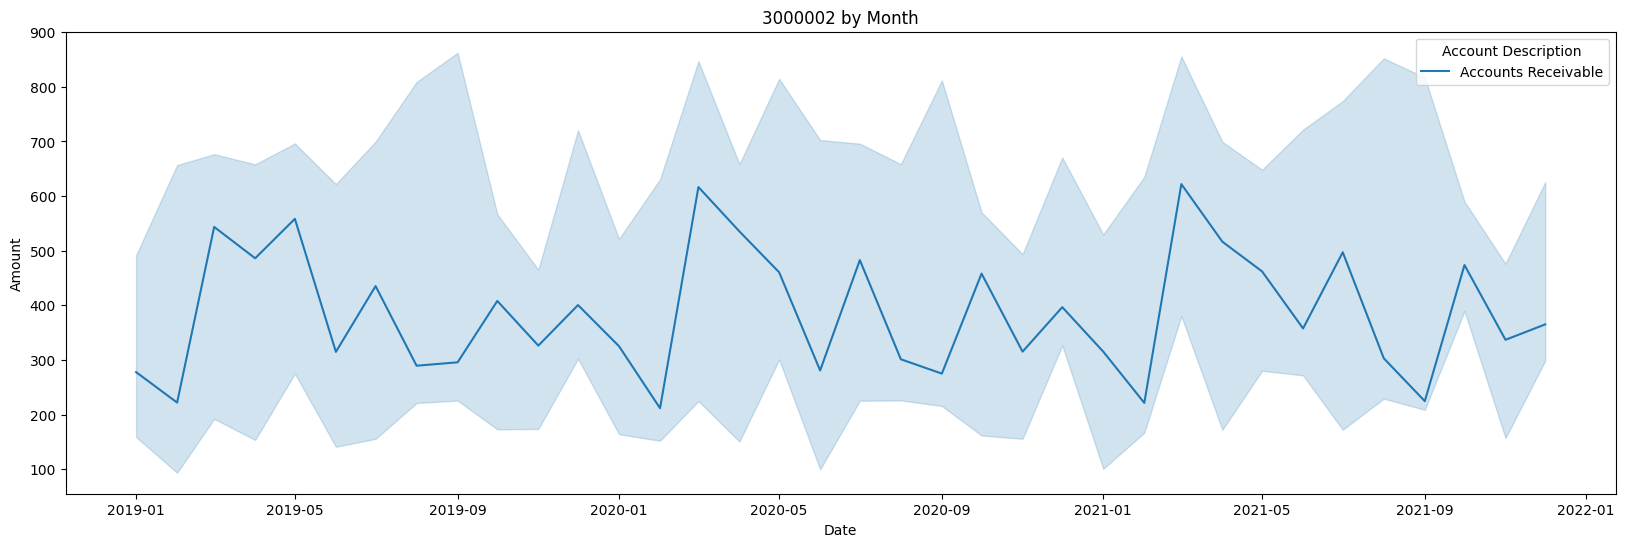

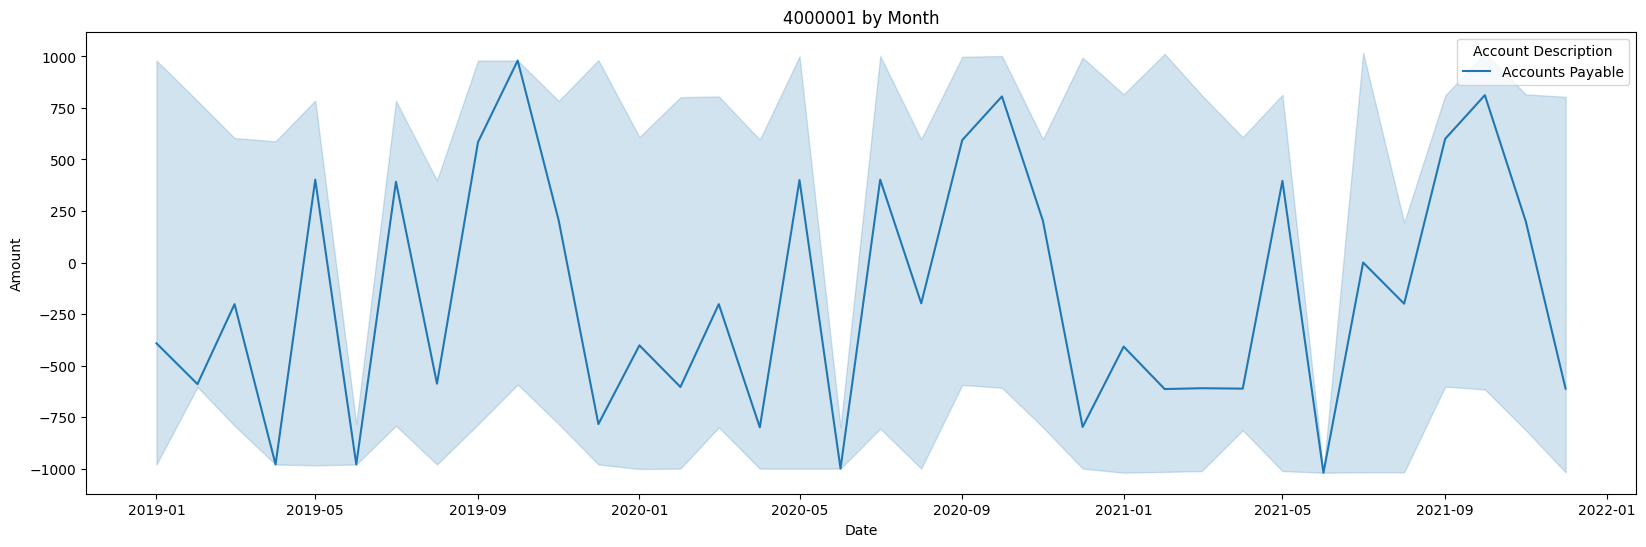

In [ ]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

  

In [ ]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001])

In [ ]:
df = df[df['Account'] != 3000001]

In [ ]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])

### Convert Fields to correct DataTypes


In [ ]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [ ]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

###drop columns


In [ ]:
df.drop(['Period','Day' , 'Date'], axis =1 , inplace = True)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
len(df['Account'].unique())

12

In [ ]:
len(df['Account Description'].unique())

12

In [ ]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [ ]:
len(df['AccountVal'].unique())

12

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [ ]:
df.drop(['Account Description', 'AccountVal'], axis = 1 , inplace=True)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

#Modelling


In [ ]:
X = df.drop('Amount', axis = 1)

In [ ]:
y = df['Amount']

In [ ]:
X

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4207,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4208,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
y

0       1344.051
1        480.968
2        650.820
3        339.360
4       1125.328
          ...   
4206     540.060
4207     698.121
4208    -282.056
4210    1152.680
4211   -1020.000
Name: Amount, Length: 3888, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 123)

In [ ]:
print(X_train.shape, X_test.shape,  y_train.shape , y_test.shape)

(2721, 40) (1167, 40) (2721,) (1167,)


## 5 models 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
pipelines = {
    'rf' : make_pipeline(RandomForestRegressor(random_state = 1234) ),
    'gb' : make_pipeline(GradientBoostingRegressor( random_state = 1234)),
    'ridge': make_pipeline(Ridge ( random_state = 1234)),
    'lasso': make_pipeline(Lasso(random_state = 1234)),
    'enet': make_pipeline(ElasticNet(random_state = 1234))

}

## to get to know the hyperparamenters for various algorithms: 
### use Algo().get_params() 

In [ ]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
# setting up hyperparamenter grid so can be used in pipeline use __ ( double underscore)
#use of same variables as used in pipeline so the dictionary can access.

hypergrid = {
    
        'rf': { 'RandomForestRegressor__min_samples_split' : [2,4,6],
                'RandomForestRegressor__min_samples_leaf' : [1,2,3] },
        'gb': {'GradientBoostingRegressor__alpha' : [0.001,0.005,0.01,0.05,0,1,0.5,0.99] },
        
       'ridge': {'Ridge__alpha':[0.001,0.005,0.01,0.05,0,1,0.5,0.99]},
       'lasso': {'Lasso__alpha':[0.001,0.005,0.01,0.05,0,1,0.5,0.99]},

       'enet': {'ElasticNet__alpha' :[0.001,0.005,0.01,0.05,0,1,0.5,0.99] }

}

##Grid searchCV


In [ ]:
##Grid searchCV
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [ ]:
fit_models = {}
for algo,pipeline in pipelines.items():
  print(algo)

rf
gb
ridge
lasso
enet


In [ ]:
fit_models = {}
for algo,pipeline in pipelines.items():
  print(pipeline)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=1234))])
Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1234))])
Pipeline(steps=[('ridge', Ridge(random_state=1234))])
Pipeline(steps=[('lasso', Lasso(random_state=1234))])
Pipeline(steps=[('elasticnet', ElasticNet(random_state=1234))])


In [ ]:

pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [ ]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [ ]:
fit_models['ridge'].predict(X_test)

array([ 547.75587812,  898.07167658,  398.83418139, ..., -189.84404645,
        434.07166961,  621.88182093])

#Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8465680829747482 MAE:130.13406758354756
gb scores - R2:0.47296195258542384 MAE:257.72999582768136
ridge scores - R2:0.3499070230221084 MAE:287.77695903843585
lasso scores - R2:0.35085727443592174 MAE:287.6501581545767
enet scores - R2:0.35204159228993903 MAE:287.52035319553295


based on above , RF is the obvisous model that is selected.